In [1]:
import function as f

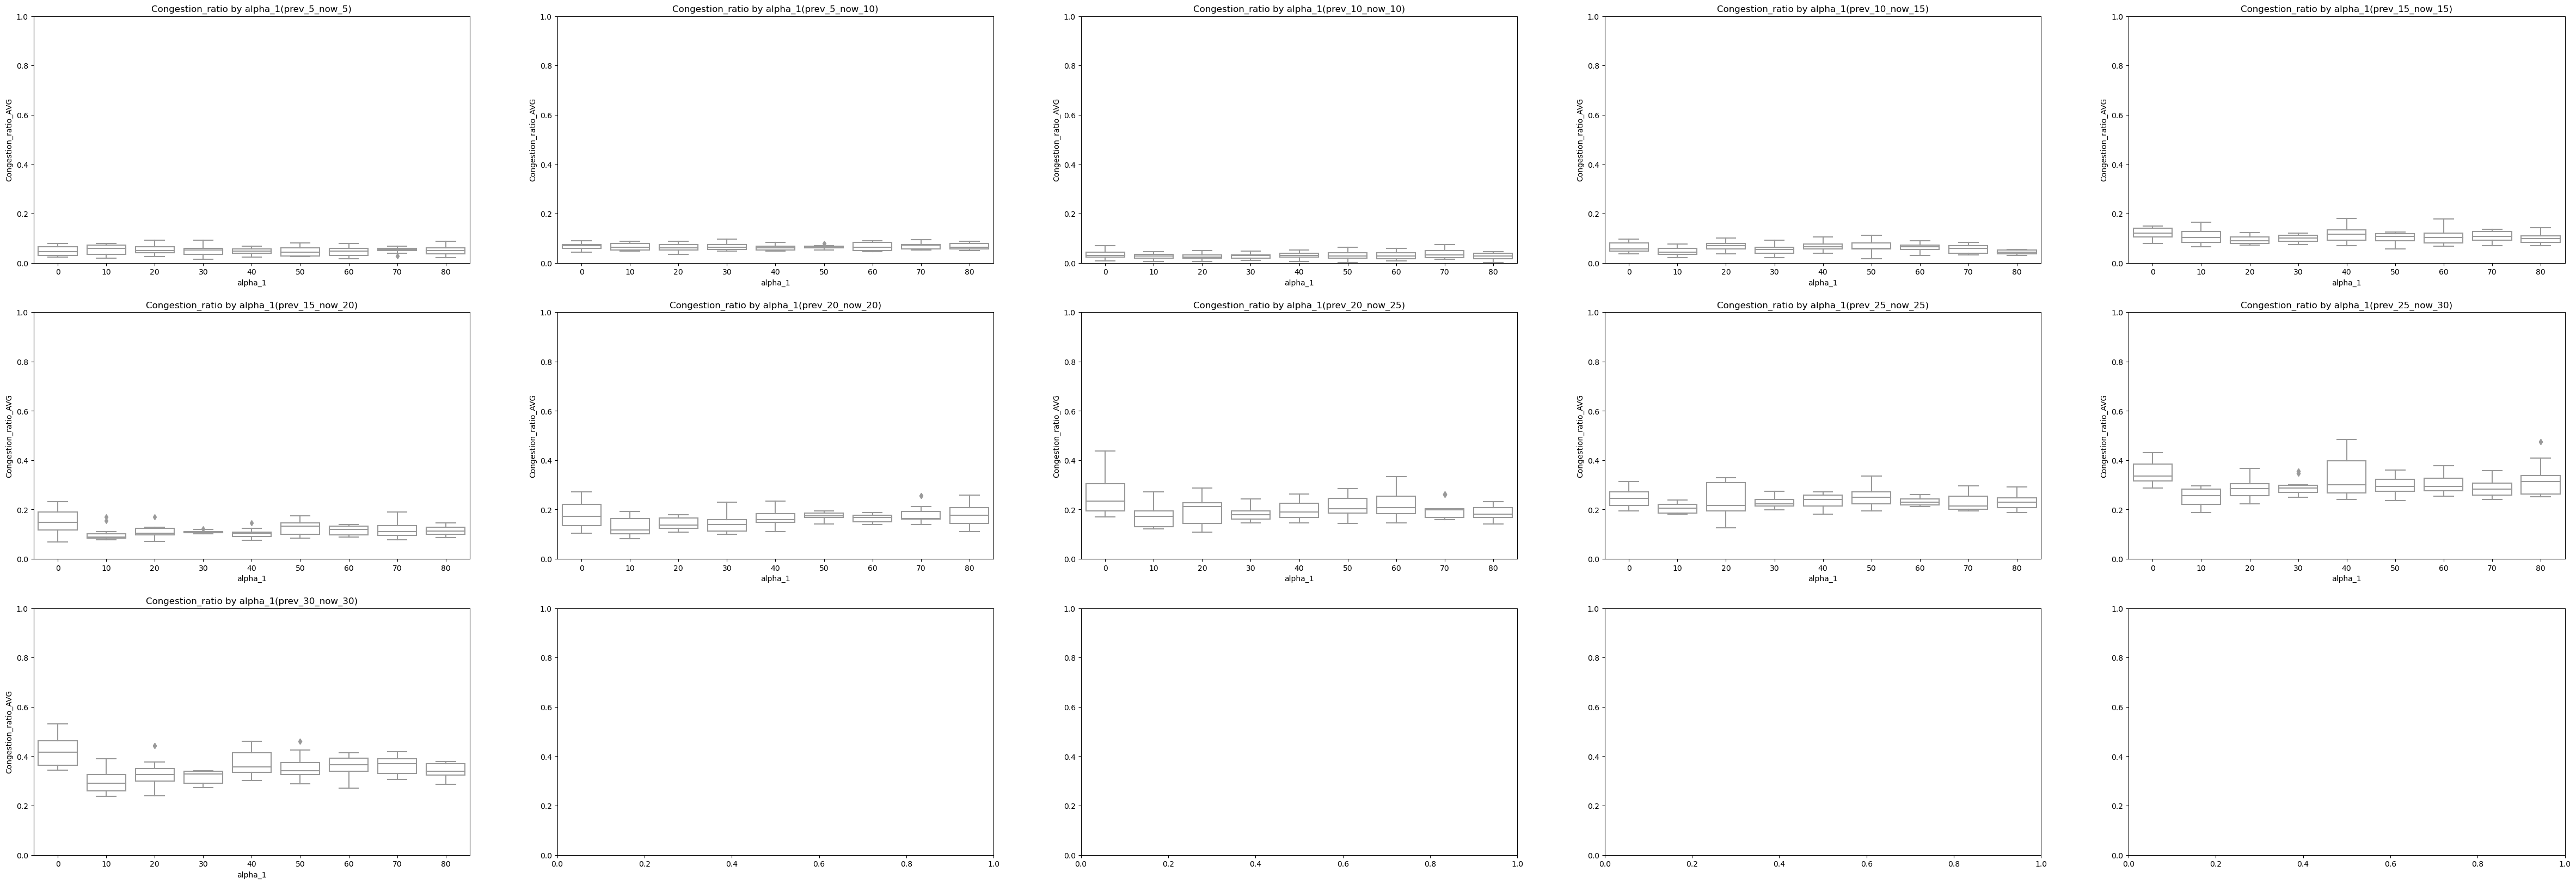

In [2]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = 'Congestion_ratio_AVG'
title = 'Congestion_ratio by alpha_1'
col_num = 5
y_lim = (0, 1)
# fig_size = (36, 12)
fig_size = (60, 20)

dfs = f.get_dfs_by_folder(folder_path, y_col)

f.boxsubplot(dfs, x_col, y_col, col_num, y_lim, title, fig_size)

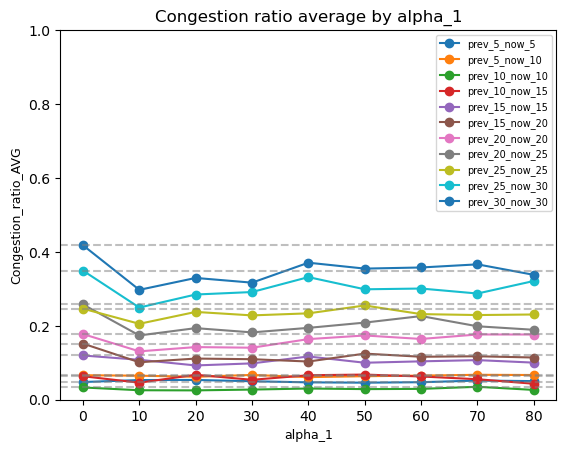

In [3]:
title = 'Congestion ratio average by alpha_1'
f.lineplot(dfs, x_col, y_col, y_lim, title)

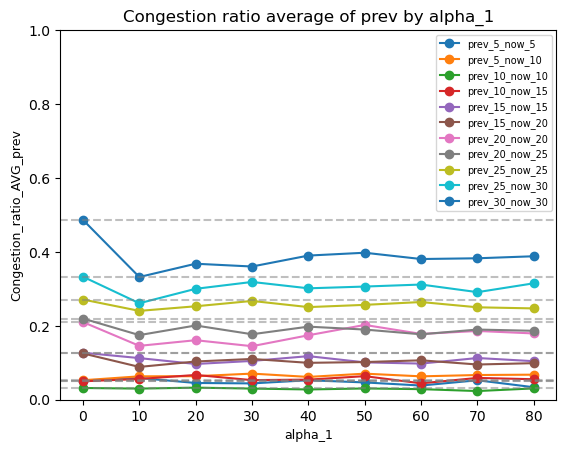

In [4]:
x_col = 'alpha_1'
y_col = 'Congestion_ratio_AVG_prev'

prev_dfs = f.get_dfs_by_folder(folder_path, y_col)
title = 'Congestion ratio average of prev by alpha_1'

f.lineplot(prev_dfs, x_col, y_col, y_lim, title)

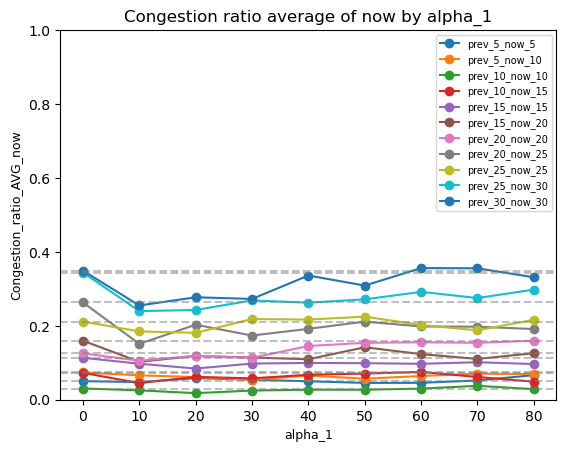

In [5]:
x_col = 'alpha_1'
y_col = 'Congestion_ratio_AVG_now'

now_dfs = f.get_dfs_by_folder(folder_path, y_col)
title = 'Congestion ratio average of now by alpha_1'

f.lineplot(now_dfs, x_col, y_col, y_lim, title)

min :  -0.07936049 max :  0.1778055
min :  -0.06721275 max :  0.230277
min :  -0.08844566 max :  0.2019033
min :  -0.09546259 max :  0.2877404
min :  -0.09306592 max :  0.4225353
min :  -0.08636567 max :  0.5024509
min :  -0.08924523 max :  0.5516691
min :  -0.07814434 max :  0.6863599
min :  -0.06185265 max :  0.7803692
min :  -0.07635883 max :  0.9953355
min :  -0.07397099 max :  1.24012


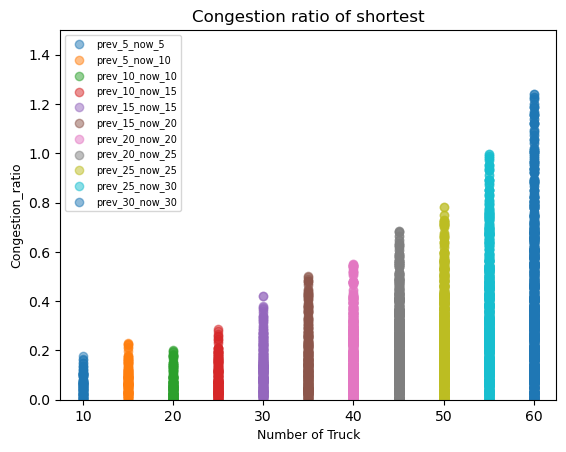

In [6]:
title = 'Congestion ratio of shortest'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
y_col = 'Congestion_ratio'
y_lim = (0, 1.5)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, y_col)

x_value = []
shortest_dfs = {}
# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]
    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    
    print('min : ', shortest_df[y_col].min(), 'max : ', shortest_df[y_col].max())
    
f.scatterplot(shortest_dfs, x_value, x_label, y_col, y_lim, title, legend_loc)

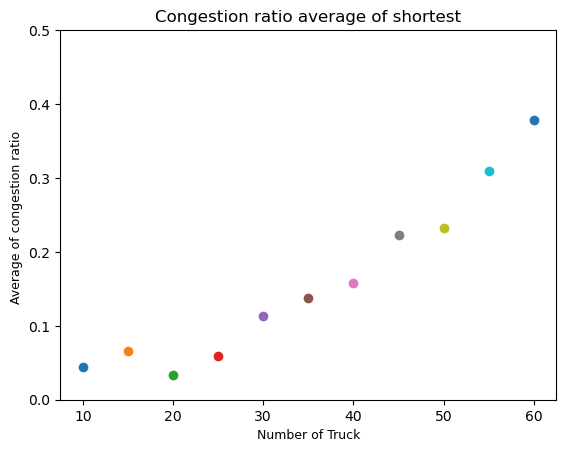

In [8]:
import matplotlib.pyplot as plt

title = 'Congestion ratio average of shortest'

x_col = ['Prev Truck Number', 'Now Truck Number']
y_col = 'Congestion_ratio'
y_lim = (0, 0.5)

dfs = f.get_dfs_by_folder(folder_path, y_col)

# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0 and get average of y_col
    shortest_df = value[value['alpha_1'] == 0]
    
    x_value = shortest_df[x_col].iloc[0].astype(int).sum()
    y_value = shortest_df[y_col].astype(float).mean()

    plt.scatter(x_value, y_value)

plt.ylim(y_lim)    
plt.title(title)
plt.xlabel('Number of Truck', fontsize = 9)
plt.ylabel('Average of congestion ratio ', fontsize = 9)

plt.show()

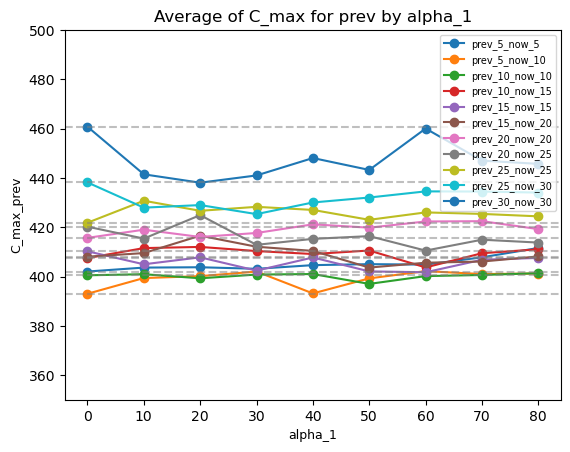

In [13]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = 'C_max_prev'
title = 'Average of C_max for prev by alpha_1'

y_lim = (350, 500)

c_max_prev_dfs = f.get_dfs_by_folder(folder_path, y_col)

f.lineplot(c_max_prev_dfs, x_col, y_col, y_lim, title)

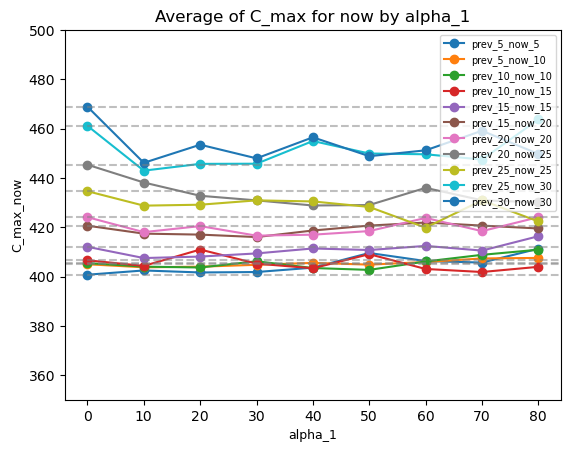

In [14]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = 'C_max_now'
title = 'Average of C_max for now by alpha_1'

y_lim = (350, 500)

c_max_now_dfs = f.get_dfs_by_folder(folder_path, y_col)

f.lineplot(c_max_now_dfs, x_col, y_col, y_lim, title)

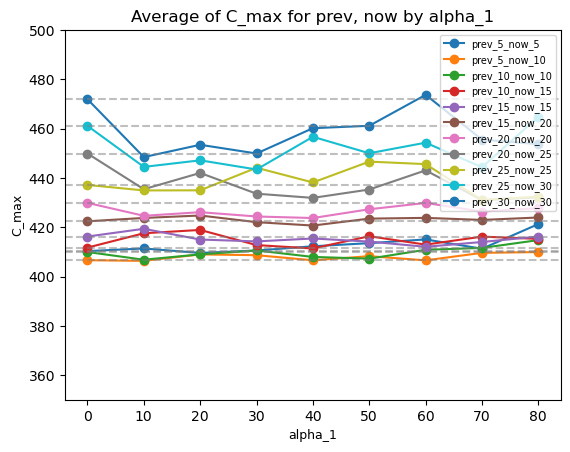

In [15]:
folder_path = 'results'
x_col = 'alpha_1'
y_col = 'C_max'
title = 'Average of C_max for prev, now by alpha_1'

y_lim = (350, 500)

c_max_dfs = f.get_dfs_by_folder(folder_path, y_col)

f.lineplot(c_max_dfs, x_col, y_col, y_lim, title)